In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cottonprices/cotton-prices-historical-chart-data.csv
/kaggle/input/model2/model2.json
/kaggle/input/model2/model2.h5
/kaggle/input/trained-values/model.json
/kaggle/input/trained-values/model.h5


In [75]:
import pandas as pd
dataset = pd.read_csv("../input/cottonprices/cotton-prices-historical-chart-data.csv")

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11898 entries, 0 to 11897
Data columns (total 1 columns):
 value    11898 non-null float64
dtypes: float64(1)
memory usage: 93.1 KB


In [77]:
training_set = dataset.iloc[:9898].values
test_set = dataset.iloc[9898:].values

In [78]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [79]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [80]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [35]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [ ]:
model_json = regressor.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
regressor.save_weights("model.h5")

In [56]:
from keras.models import model_from_json
# load json and create model
json_file = open('../input/trained-values/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
regressor = model_from_json(loaded_model_json)
# load weights into new model
regressor.load_weights("../input/trained-values/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [57]:
X_test = []
dataset = dataset.iloc[:].values
for i in range(len(training_set), len(dataset)):
    X_test.append(dataset[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [58]:
predicted_test_values = regressor.predict(X_test)
predicted_test_values = sc.inverse_transform(predicted_test_values)

In [59]:
predicted_test_values = predicted_test_values

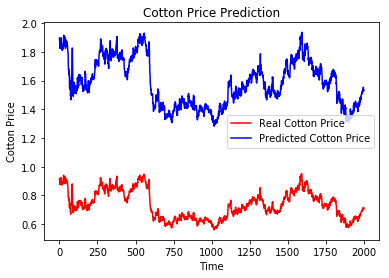

In [60]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(test_set, color = 'red', label = 'Real Cotton Price')
plt.plot(predicted_test_values, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

In [61]:
predicted_test_values = predicted_test_values-1

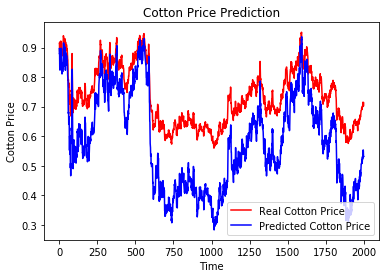

In [62]:
# Visualising the results by subtracting 1
import matplotlib.pyplot as plt

plt.plot(test_set, color = 'red', label = 'Real Cotton Price')
plt.plot(predicted_test_values, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

# **Changing the optimizer**

In [13]:
regressor2 = Sequential()

In [15]:
# Adding the first LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor2.add(Dropout(0.2))

In [16]:
# Adding a second LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

In [17]:
# Adding a third LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50))
regressor2.add(Dropout(0.2))

In [18]:
# Adding the output layer
regressor2.add(Dense(units = 1))

# Compiling the RNN
regressor2.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

In [81]:
from keras.models import model_from_json
# load json and create model
json_file = open('../input/model2/model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
regressor2 = model_from_json(loaded_model_json)
# load weights into new model
regressor2.load_weights("../input/model2/model2.h5")
print("Loaded model from disk")

Loaded model from disk


In [44]:
# Fitting the RNN to the Training set
regressor2.fit(X_train, y_train, epochs = 100, batch_size = 32)

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [20]:
model_json = regressor2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
regressor2.save_weights("model2.h5")

In [82]:
X_test2 = []
dataset = dataset.iloc[:].values
for i in range(len(training_set), len(dataset)):
    X_test2.append(dataset[i-60:i, 0])
X_test2 = np.array(X_test2)
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))

In [87]:
predicted_test_values2 = regressor2.predict(X_test2)
predicted_test_values2 = sc.inverse_transform(predicted_test_values2)

In [88]:
predicted_test_values2 = predicted_test_values2

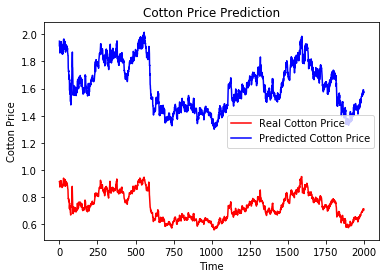

In [89]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(test_set, color = 'red', label = 'Real Cotton Price')
plt.plot(predicted_test_values2, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')

In [90]:
predicted_test_values2 = predicted_test_values2-1

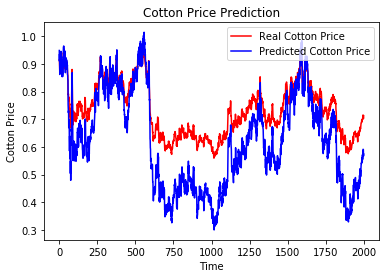

In [91]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(test_set, color = 'red', label = 'Real Cotton Price')
plt.plot(predicted_test_values2, color = 'blue', label = 'Predicted Cotton Price')
plt.title('Cotton Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cotton Price')
plt.legend()
plt.savefig('prices.jpg')